##### Vladislav Gorokhov

# Задача обнаружения мошенничества

Банки часто сталкиваются с мошенническими транзакциями и постоянно совершенствуют системы для их отслеживания. Этот набор банковских данных содержит более 20 тыс. транзакций со 112 функциями (числовыми признаками).
Построим модель бинарной классификации для обнаружения мошеннических транзакций.

Загрузка библиотек и предварительный анализ данных:

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Pastel1')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Подготовка данных и моделирование

Считаем файл fraud_detection_bank_dataset.csv в переменную data и изучим данные

In [2]:
data = pd.read_csv('./fraud_detection_bank_dataset.csv')
data.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [3]:
data.shape

(20468, 114)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


Имеем 20468 записей по 114 признаков.

Удалим столбец Unnamed: 0

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.shape

(20468, 113)

Проверим наличие пропусков

In [6]:
data.isnull().sum()

col_0      0
col_1      0
col_2      0
col_3      0
col_4      0
          ..
col_108    0
col_109    0
col_110    0
col_111    0
targets    0
Length: 113, dtype: int64

Пропусков в данных нет.

Описательная статистика

In [7]:
data.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


Проверим уникальные записи в каждом столбце. Если столбец содержит только одно уникальное значение, то этот столбец не важен

In [8]:
columns_drop = []
for col in data.columns:
    if data[col].unique().sum() == 0:
        columns_drop.append(col)
print(columns_drop)

['col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_18', 'col_19', 'col_20', 'col_21', 'col_35', 'col_51', 'col_52', 'col_53', 'col_70', 'col_71']


In [9]:
# столбцы col_8  col_9, col_10, col_11, col_12, col_18, col_19, col_20, col_21, col_35, col_51, col_52, col_53, col_70 и col_71 можно удалить
data.drop(columns_drop, axis=1, inplace=True)
data.shape

(20468, 98)

Описательная статистика

In [10]:
data.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.038646,0.363152,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.192754,0.480920,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


Определим количество записей каждого класса

D:\Programs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


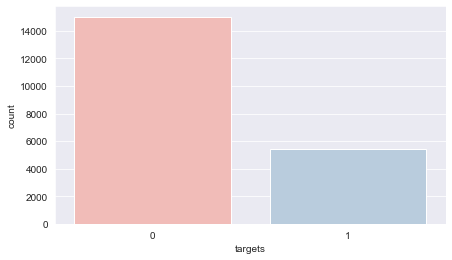

Ratio Target Class


0    0.734317
1    0.265683
Name: targets, dtype: float64

In [11]:
plt.figure(figsize=(7, 4))
sns.countplot(data['targets'])
plt.show()

print('Ratio Target Class')
data['targets'].value_counts(normalize=True)

Построим матрицу корреляций

In [12]:
corr = data.corr()
corr

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
col_0,1.000000,0.551274,0.005679,0.077408,-0.002019,0.037343,0.011153,1.000000,0.044412,0.081488,...,0.009964,-0.009675,0.003354,0.075413,0.078262,0.000603,0.011074,0.015806,0.052114,-0.041022
col_1,0.551274,1.000000,0.301637,0.280233,0.102733,0.246112,0.008418,0.551274,0.049807,0.195358,...,0.077884,0.021930,0.031179,0.232897,0.290501,-0.001469,0.088685,0.111713,0.206308,-0.109658
col_2,0.005679,0.301637,1.000000,0.018034,0.068560,-0.009578,0.001042,0.005679,-0.002485,0.010522,...,0.024692,0.001027,0.009001,0.041971,0.054846,0.005294,0.029326,0.009831,0.033094,-0.026381
col_3,0.077408,0.280233,0.018034,1.000000,-0.012554,-0.015184,-0.044345,0.077408,0.004267,0.097291,...,0.091980,-0.038370,0.046253,0.148617,0.199203,-0.001617,0.070381,0.049871,0.127431,-0.095612
col_4,-0.002019,0.102733,0.068560,-0.012554,1.000000,0.040922,0.014800,-0.002019,-0.002148,0.019296,...,0.019427,0.025733,-0.000212,0.059956,0.077622,-0.000695,0.051145,0.006374,0.056226,0.007819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_108,0.000603,-0.001469,0.005294,-0.001617,-0.000695,-0.001556,-0.000894,0.000603,-0.001401,-0.005278,...,-0.000469,-0.005221,-0.000346,0.010468,0.014398,1.000000,0.030680,-0.000556,0.013871,-0.004204
col_109,0.011074,0.088685,0.029326,0.070381,0.051145,0.124398,-0.003134,0.011074,0.006984,-0.023821,...,0.082940,0.107412,0.061839,0.057408,0.114461,0.030680,1.000000,0.139361,0.369065,0.166826
col_110,0.015806,0.111713,0.009831,0.049871,0.006374,0.116577,-0.008749,0.015806,0.022261,0.031141,...,0.040426,0.003011,0.200445,0.061286,0.150089,-0.000556,0.139361,1.000000,0.334947,0.071049
col_111,0.052114,0.206308,0.033094,0.127431,0.056226,0.223831,0.021537,0.052114,0.036921,0.037503,...,0.136194,0.402607,0.124260,0.221531,0.329699,0.013871,0.369065,0.334947,1.000000,0.262442


Построим матрицу корреляции 15 значений, которые в основном коррелируют с целевым столбцом

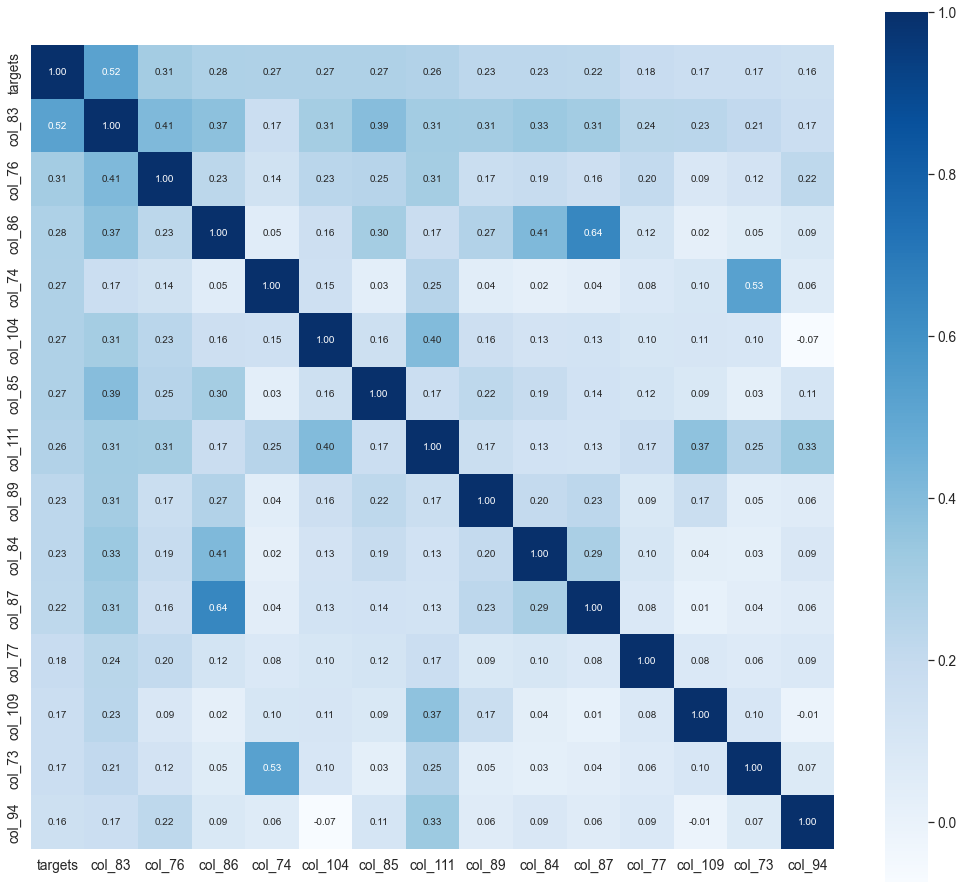

In [13]:
plt.figure(figsize=(18, 16))
k = 15
cols = corr.nlargest(k, 'targets')['targets'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

Построим графики плотности распределения

D:\Programs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

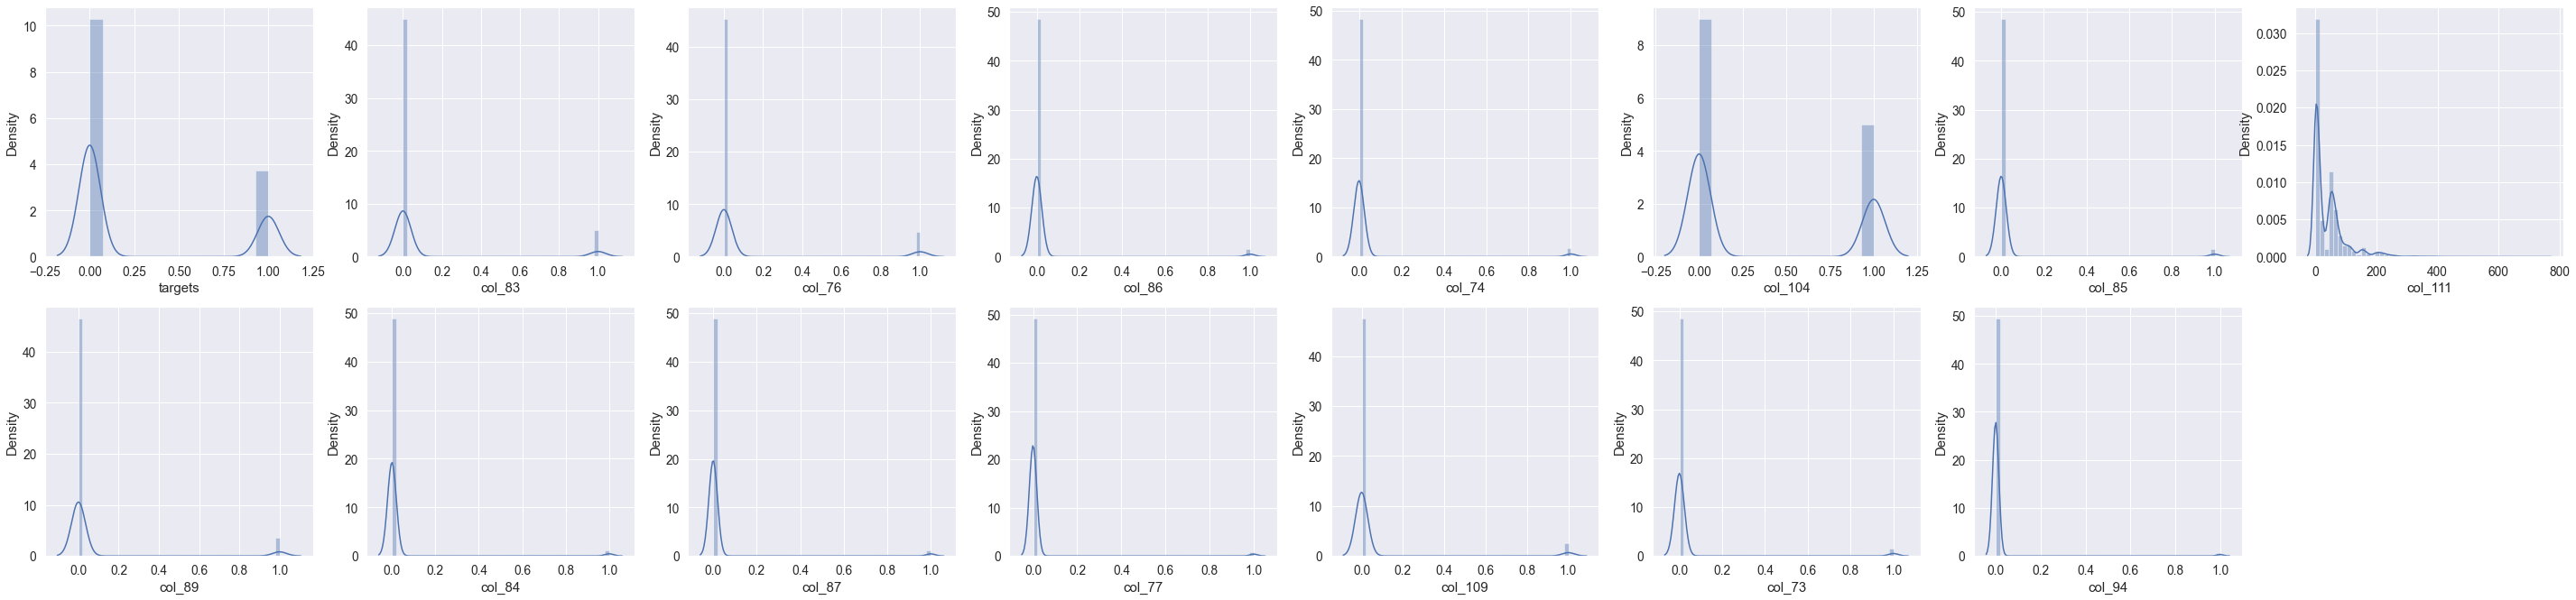

In [23]:
fig = plt.figure(figsize=(50, 60))
for i, v in enumerate(data[cols].columns):
   axes = fig.add_subplot(10, 8, i + 1)
   sns.distplot(data[cols][v], ax=axes)

Подготовим обучающий и тестовый наборы данных

In [16]:
X = data.drop(['targets'], axis=1)
y = data.targets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
print ('Обучающий набор:', X_train.shape,  y_train.shape)
print ('Тестовый набор:', X_test.shape,  y_test.shape)

Обучающий набор: (15351, 97) (15351,)
Тестовый набор: (5117, 97) (5117,)


## K-Nearest-Neighbor (KNN)

Алгоритм k ближайших соседей

In [22]:
from sklearn.model_selection import validation_curve

In [23]:
# выполняем поиск оптимального числа соседей
param_range = np.array([70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y, param_name='n_neighbors', param_range=param_range)

In [24]:
print(train_scores)
print(np.mean(train_scores, axis=1))

[[0.84676927 0.84035666 0.84170026 0.84219847 0.8440916 ]
 [0.84664712 0.84078417 0.84212776 0.84305344 0.84335878]
 [0.84786857 0.84224991 0.84389886 0.84396947 0.84500763]
 [0.84915109 0.84176133 0.84322707 0.84458015 0.84500763]
 [0.85006718 0.84304385 0.84505924 0.84622901 0.8470229 ]
 [0.85006718 0.84395994 0.84695249 0.84690076 0.84738931]
 [0.85171614 0.84634176 0.84731892 0.84879389 0.84885496]
 [0.85257115 0.84915109 0.84799072 0.85123664 0.85117557]
 [0.85617442 0.8506779  0.85171614 0.85416794 0.85367939]
 [0.85898375 0.85299866 0.85257115 0.85422901 0.85416794]
 [0.86380848 0.85562477 0.85660193 0.85874809 0.8581374 ]
 [0.86643459 0.85880054 0.86112129 0.86308397 0.86143511]
 [0.87492366 0.86722853 0.86899963 0.87126718 0.86625954]
 [0.87321363 0.86954929 0.8686332  0.87059542 0.86760305]
 [0.87773299 0.87156468 0.87254183 0.8749313  0.86998473]
 [0.87987053 0.87467937 0.87498473 0.87596947 0.87291603]
 [0.88267986 0.87693905 0.87944302 0.88146565 0.87853435]
 [0.88695493 0

In [25]:
print(test_scores)
print(np.mean(test_scores, axis=1))

[[0.8234001  0.84538349 0.84391793 0.840215   0.84363548]
 [0.8221788  0.84538349 0.84367367 0.84094796 0.84363548]
 [0.82266732 0.84513923 0.84220811 0.84168092 0.84583435]
 [0.82120176 0.84831461 0.84123107 0.84119228 0.84656731]
 [0.82242306 0.84953591 0.84513923 0.8414366  0.84827755]
 [0.82144602 0.84978017 0.84489497 0.84119228 0.84754459]
 [0.82388862 0.85271128 0.84855887 0.84168092 0.84681163]
 [0.82315584 0.85344406 0.85246702 0.84094796 0.84876619]
 [0.82608696 0.85490962 0.85246702 0.84216956 0.84925483]
 [0.8234001  0.85539814 0.85661944 0.84436843 0.84876619]
 [0.8258427  0.858085   0.85710796 0.84705595 0.84998778]
 [0.8234001  0.85881778 0.85784074 0.84778891 0.85340826]
 [0.83048363 0.8666341  0.85906204 0.84705595 0.85560713]
 [0.83097215 0.86003908 0.85759648 0.84925483 0.85511849]
 [0.83194919 0.8629702  0.86101612 0.8502321  0.85609577]
 [0.83146067 0.85857352 0.85613092 0.85194234 0.8538969 ]
 [0.83585735 0.86028334 0.86150464 0.84949914 0.85634009]
 [0.83463605 0

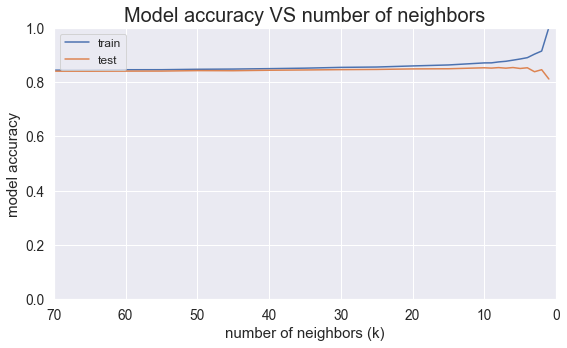

In [28]:
# визуализация кривой валидации - зависимости точности (accuracy) от числа соседей (k)
plt.figure(figsize=(9, 5))
plt.plot(param_range, np.mean(train_scores, axis=1))
plt.plot(param_range, np.mean(test_scores, axis=1))
plt.xlim(np.max(param_range), 0)  # разворот оси Х
plt.ylim(0, 1)
plt.title('Model accuracy VS number of neighbors', fontsize=20)
plt.xlabel('number of neighbors (k)', fontsize=15)
plt.ylabel('model accuracy', fontsize=15)
plt.legend(['train', 'test'], loc='upper left', fontsize=12)
plt.show()

Оптимальное число соседей равно 8.

Обучим модель и используем ее для предсказания меток классов

In [29]:
knn_fit = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

In [30]:
y_knn_pred = knn_fit.predict(X_test)

Проверим качество классификатора. Для этого построим матрицу ошибок и ROC-кривую, а также выведем отчет о классификации

[[3566  244]
 [ 506  801]]


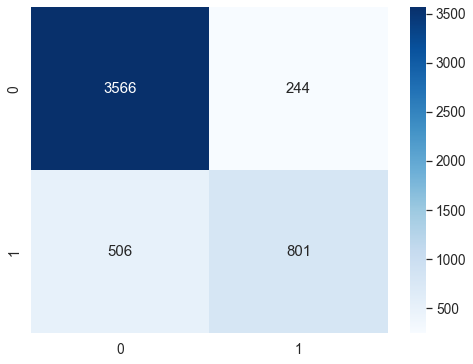

In [31]:
conf_matrix = confusion_matrix(y_test, y_knn_pred, labels=[0, 1])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], fmt='g', cmap='Blues')
plt.show()

In [32]:
# отчет о классификации
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.90      3810
           1       0.77      0.61      0.68      1307

    accuracy                           0.85      5117
   macro avg       0.82      0.77      0.79      5117
weighted avg       0.85      0.85      0.85      5117



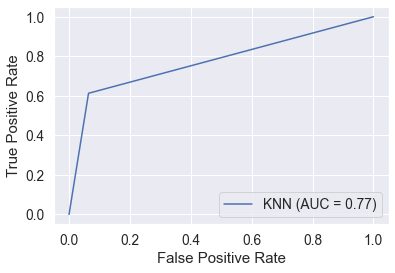

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_knn_pred)
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr), estimator_name='KNN')
roc_curve.plot()
plt.show()

## Decision Tree

Дерево решений

In [34]:
# подбор оптимальной глубины дерева
param_range = np.arange(1, 100)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, param_name='max_depth', param_range=param_range)

In [35]:
print(train_scores)
print(np.mean(train_scores, axis = 1))

[[0.7693905  0.76645902 0.76529864 0.76616794 0.76525191]
 [0.86631245 0.85519726 0.85391474 0.85887023 0.8579542 ]
 [0.88597777 0.86851105 0.88017589 0.88177099 0.88073282]
 [0.89184072 0.89434469 0.88732136 0.89099237 0.8899542 ]
 [0.90802492 0.90729205 0.90613167 0.90259542 0.9061374 ]
 [0.92207158 0.91584219 0.91755222 0.91554198 0.91712977]
 [0.92787346 0.92085013 0.92494198 0.92280916 0.92574046]
 [0.93385856 0.92726273 0.93184317 0.93019847 0.93068702]
 [0.94204226 0.93404177 0.93941615 0.93593893 0.93746565]
 [0.9494931  0.9399658  0.94479052 0.94314504 0.94839695]
 [0.95669965 0.94741664 0.95230243 0.95071756 0.95603053]
 [0.9650055  0.95602785 0.95993648 0.95737405 0.96384733]
 [0.97037987 0.96317332 0.96757054 0.96323664 0.96885496]
 [0.9763039  0.96812019 0.97306706 0.97001527 0.97361832]
 [0.98149505 0.97361671 0.97813607 0.97429008 0.97783206]
 [0.98595334 0.9774032  0.98216685 0.97899237 0.98180153]
 [0.98931232 0.98100647 0.98619763 0.98332824 0.98528244]
 [0.99236595 0

In [36]:
print(test_scores)
print(np.mean(test_scores, axis = 1))

[[0.75500733 0.7667318  0.77137274 0.76789641 0.7715612 ]
 [0.83488031 0.85784074 0.8629702  0.86464696 0.86831175]
 [0.8617489  0.87200782 0.89032731 0.87857317 0.88272661]
 [0.8641915  0.90327308 0.89057157 0.88785732 0.89030051]
 [0.88153395 0.9147533  0.90815828 0.8964085  0.9064256 ]
 [0.89057157 0.92110405 0.91573034 0.91351087 0.91448815]
 [0.89447973 0.92208109 0.91646312 0.91204495 0.91717567]
 [0.89399121 0.92208109 0.91646312 0.91522111 0.91693135]
 [0.89374695 0.92354665 0.92256961 0.911312   0.91644271]
 [0.89667807 0.92427943 0.92330239 0.91668703 0.91937454]
 [0.89521251 0.92769907 0.91695164 0.91619839 0.92157342]
 [0.89643381 0.92745481 0.91695164 0.91302223 0.91986318]
 [0.89570103 0.92916463 0.91890572 0.91644271 0.92059614]
 [0.89057157 0.92574499 0.91744016 0.91497679 0.92035182]
 [0.88983879 0.92281387 0.91426478 0.91326655 0.91497679]
 [0.88983879 0.92061553 0.91304348 0.91180064 0.91619839]
 [0.89057157 0.92110405 0.91255496 0.9088688  0.91375519]
 [0.89106009 0

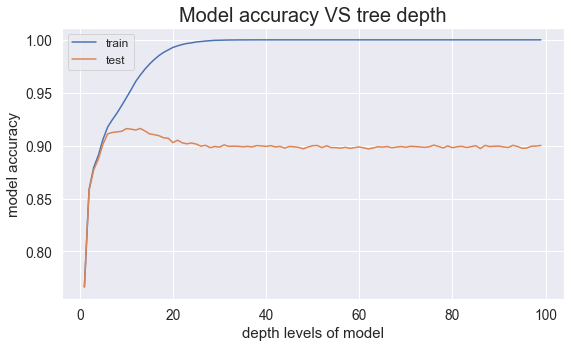

In [37]:
plt.figure(figsize=(9, 5))
plt.plot(param_range, np.mean(train_scores, axis=1))
plt.plot(param_range, np.mean(test_scores, axis=1))
plt.title('Model accuracy VS tree depth', fontsize=20)
plt.xlabel('depth levels of model', fontsize=15)
plt.ylabel('model accuracy', fontsize=15)
plt.legend(['train', 'test'], loc='upper left', fontsize=12)
plt.show()

Оптимальная глубина дерева равна 4.

Обучим классификатор и проверим его качество

In [38]:
dtree_fit = DecisionTreeClassifier(criterion='entropy', max_depth=4).fit(X_train, y_train)

In [39]:
y_dtree_pred = dtree_fit.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, y_dtree_pred))

Decision Trees's Accuracy:  0.8846980652726206


[[3580  230]
 [ 360  947]]


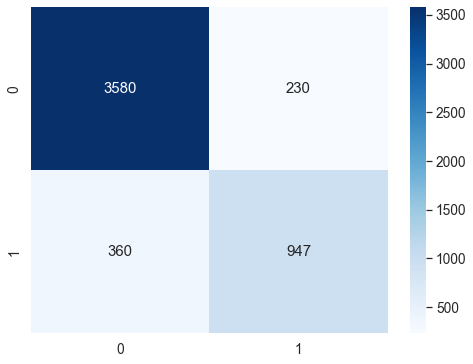

In [40]:
conf_matrix = confusion_matrix(y_test, y_dtree_pred, labels=[0, 1])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], fmt='g', cmap='Blues')
plt.show()

In [41]:
print(classification_report(y_test, y_dtree_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3810
           1       0.80      0.72      0.76      1307

    accuracy                           0.88      5117
   macro avg       0.86      0.83      0.84      5117
weighted avg       0.88      0.88      0.88      5117



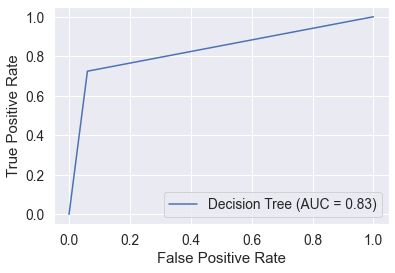

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_dtree_pred)
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr), estimator_name='Decision Tree')
roc_curve.plot()
plt.show()

Обучаем классификатор на всем исходном наборе данных и визуализируем результат

In [43]:
clf = dtree_fit.fit(X, y)

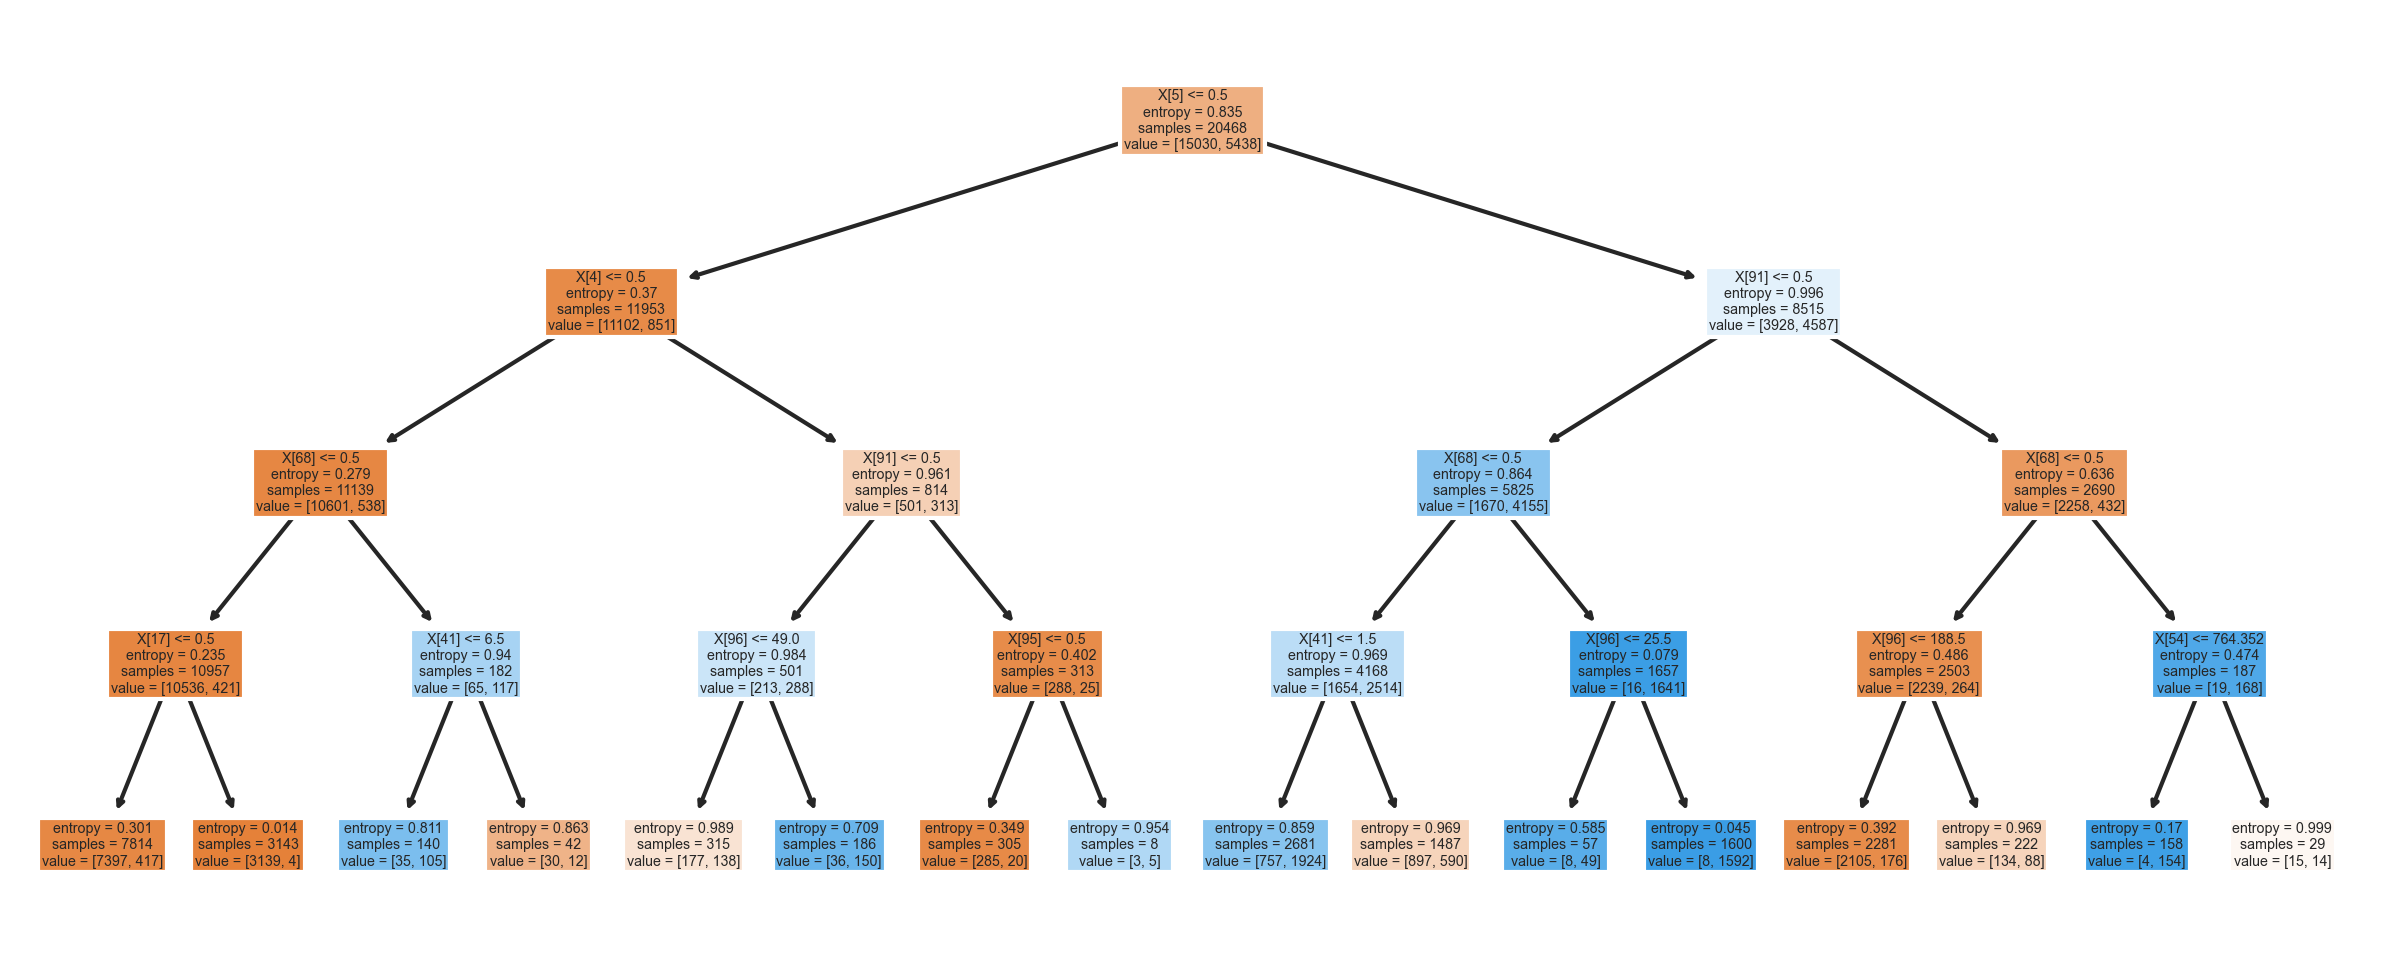

In [44]:
plt.figure(figsize=(10, 4), dpi=300)
tree.plot_tree(clf, filled=True)
plt.show()

## Logistic Regression

Логистическая регрессия

Стандартизируем входные данные

In [19]:
scaler = StandardScaler().fit(X_train)  # используются среднее и стандартное отклонение от выборки X_train
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим модель и проверим ее качество

In [47]:
logreg_fit = LogisticRegression(solver='liblinear').fit(X_train_scaled, y_train)

In [48]:
y_logreg_pred = logreg_fit.predict(X_test_scaled)
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, y_logreg_pred))

Logistic Regression's Accuracy:  0.8862614813367208


[[3710  100]
 [ 482  825]]


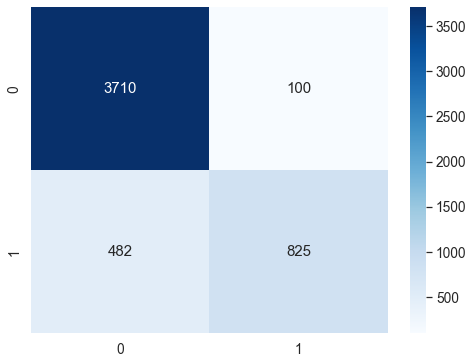

In [49]:
conf_matrix = confusion_matrix(y_test, y_logreg_pred, labels=[0, 1])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], fmt='g', cmap='Blues')
plt.show()

In [50]:
print(classification_report(y_test, y_logreg_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3810
           1       0.89      0.63      0.74      1307

    accuracy                           0.89      5117
   macro avg       0.89      0.80      0.83      5117
weighted avg       0.89      0.89      0.88      5117



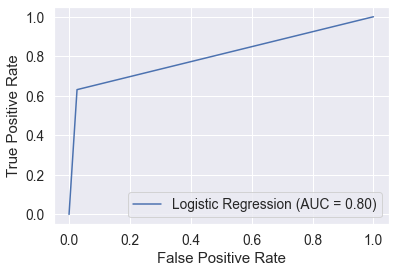

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_logreg_pred)
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr), estimator_name='Logistic Regression')
roc_curve.plot()
plt.show()

## Support Vector Classifier (SVC)

Метод опорных векторов

In [20]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

Обучаем модель на стандартизированных данных и проверяем ее качество

In [31]:
svm_fit = OneVsRestClassifier(LinearSVC(), n_jobs=-1).fit(X_train_scaled, y_train)

In [32]:
y_svm_pred = svm_fit.predict(X_test_scaled)
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, y_svm_pred))

SVM's Accuracy:  0.8753175688880204


[[3726   84]
 [ 554  753]]


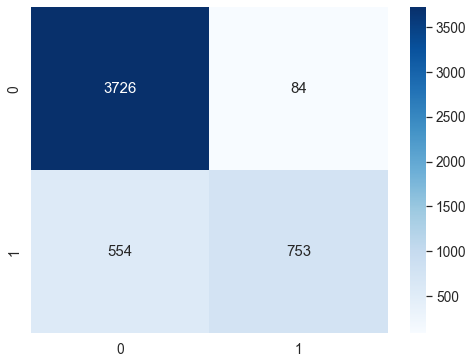

In [33]:
conf_matrix = confusion_matrix(y_test, y_svm_pred, labels=[0, 1])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], fmt='g', cmap='Blues')
plt.show()

In [34]:
print(classification_report(y_test, y_svm_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3810
           1       0.90      0.58      0.70      1307

    accuracy                           0.88      5117
   macro avg       0.89      0.78      0.81      5117
weighted avg       0.88      0.88      0.87      5117



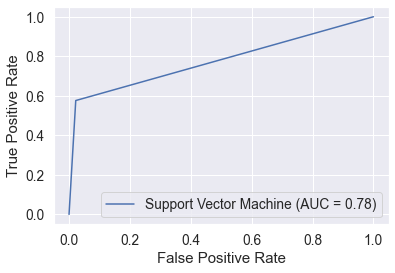

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_svm_pred)
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr), estimator_name='Support Vector Machine')
roc_curve.plot()
plt.show()

## GradientBoostingClassifier

Классификатор градиентного бустинга

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

Обучаем модель и проверяем ее качество

In [54]:
GB_fit = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=5).fit(X_train, y_train)

Выведем важности признаков

In [55]:
feature_imp = pd.Series(GB_fit.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Важности признаков:')
feature_imp

Важности признаков:


col_5      0.263667
col_83     0.207462
col_106    0.147627
col_111    0.057023
col_54     0.045478
             ...   
col_79     0.000016
col_78     0.000000
col_28     0.000000
col_108    0.000000
col_58     0.000000
Length: 97, dtype: float64

Визуализируем важность признаков для классификации

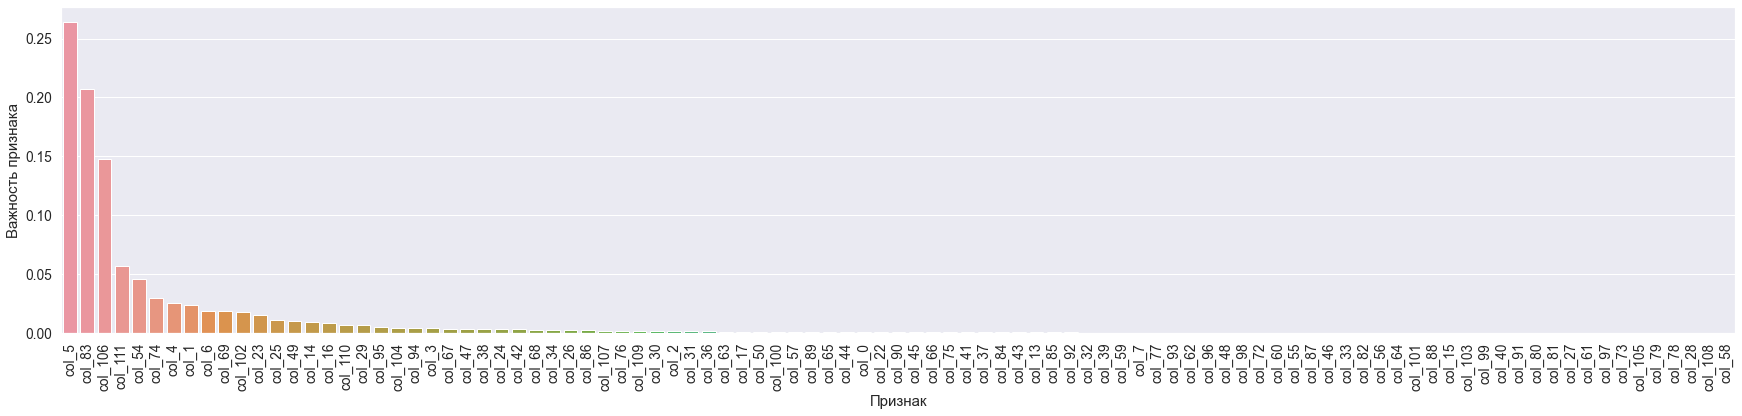

In [56]:
plt.figure(figsize=(30, 6))
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xticks(rotation=90)
plt.xlabel('Признак')
plt.ylabel('Важность признака')
plt.show()

In [57]:
y_GB_pred = GB_fit.predict(X_test)
print("Gradient Boosting Accuracy: ", metrics.accuracy_score(y_test, y_GB_pred))

Gradient Boosting Accuracy:  0.9351182333398476


[[3669  141]
 [ 191 1116]]


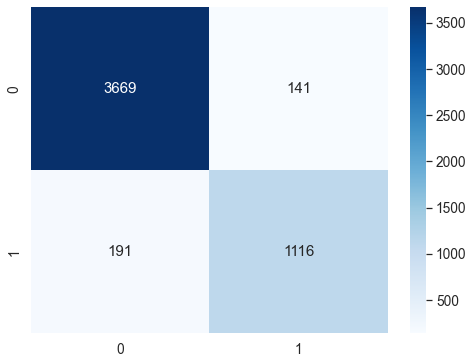

In [58]:
conf_matrix = confusion_matrix(y_test, y_GB_pred, labels=[0, 1])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], fmt='g', cmap='Blues')
plt.show()

In [59]:
print(classification_report(y_test, y_GB_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3810
           1       0.89      0.85      0.87      1307

    accuracy                           0.94      5117
   macro avg       0.92      0.91      0.91      5117
weighted avg       0.93      0.94      0.93      5117



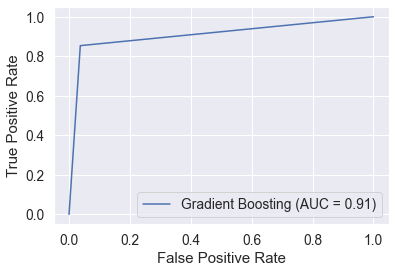

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_GB_pred)
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr), estimator_name='Gradient Boosting')
roc_curve.plot()
plt.show()

## Random Forest Classifier

Случайный лес

In [62]:
from sklearn.ensemble import RandomForestClassifier

Обучаем модель и проверяем ее качество

In [63]:
RF_fit = RandomForestClassifier(n_estimators=150, max_features='sqrt').fit(X_train, y_train)

In [64]:
y_RF_pred = RF_fit.predict(X_test)
print("Random Forest Accuracy: ", metrics.accuracy_score(y_test, y_RF_pred))

Random Forest Accuracy:  0.9314051201876099


[[3695  115]
 [ 236 1071]]


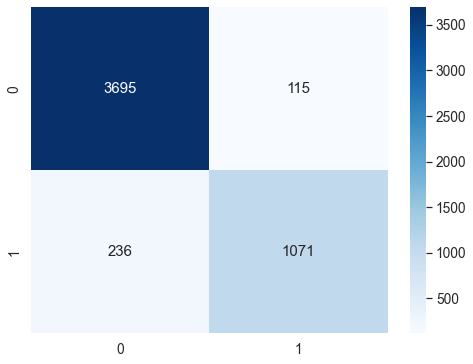

In [65]:
conf_matrix = confusion_matrix(y_test, y_RF_pred, labels=[0, 1])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], fmt='g', cmap='Blues')
plt.show()

In [66]:
print(classification_report(y_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3810
           1       0.90      0.82      0.86      1307

    accuracy                           0.93      5117
   macro avg       0.92      0.89      0.91      5117
weighted avg       0.93      0.93      0.93      5117



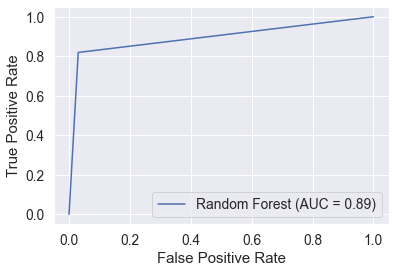

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_RF_pred)
roc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=metrics.auc(fpr, tpr), estimator_name='Random Forest')
roc_curve.plot()
plt.show()

# Визуализация результатов

Стандартизируем все исходные данные

In [36]:
scaled_df = StandardScaler().fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=X.columns)
print(scaled_df.head())
print(scaled_df.describe())

      col_0     col_1     col_2     col_3     col_4     col_5     col_6  \
0  0.280772  1.476196 -0.057013  1.556440 -0.099455  0.014242  1.528772   
1 -0.156890 -0.077758 -0.057013 -0.132033 -0.099455  0.014242 -0.790594   
2 -0.156890 -0.048490 -0.057013  0.165933 -0.099455  0.487863  1.197434   
3  0.669805  0.539643 -0.057013 -0.132033 -0.099455 -0.222568  1.860110   
4 -0.108261  0.341740 -0.057013 -0.032711 -0.099455  0.014242  1.528772   

      col_7    col_13    col_14  ...   col_102   col_103   col_104   col_105  \
0  0.280772 -0.200497  1.324261  ...  6.503963 -0.067158 -0.746943 -0.049486   
1 -0.156890 -0.200497 -0.755138  ... -0.654252 -0.067158  1.338791 -0.049486   
2 -0.156890 -0.200497  1.324261  ...  1.135302 -0.067158 -0.746943 -0.049486   
3  0.669805 -0.200497 -0.755138  ...  1.135302 -0.067158  1.338791 -0.049486   
4 -0.108261 -0.200497  1.324261  ...  1.135302 -0.067158 -0.746943 -0.049486   

    col_106   col_107  col_108  col_109   col_110   col_111  
0  1.4

Применяем метод главных компонент для уменьшения размерности данных

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca_fit = PCA(n_components=2).fit_transform(scaled_df)

In [39]:
scaled_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,...,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
0,0.280772,1.476196,-0.057013,1.556440,-0.099455,0.014242,1.528772,0.280772,-0.200497,1.324261,...,6.503963,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.22783,-0.079594,0.093114
1,-0.156890,-0.077758,-0.057013,-0.132033,-0.099455,0.014242,-0.790594,-0.156890,-0.200497,-0.755138,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,-0.22783,-0.079594,0.194438
2,-0.156890,-0.048490,-0.057013,0.165933,-0.099455,0.487863,1.197434,-0.156890,-0.200497,1.324261,...,1.135302,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.22783,-0.079594,0.211326
3,0.669805,0.539643,-0.057013,-0.132033,-0.099455,-0.222568,1.860110,0.669805,-0.200497,-0.755138,...,1.135302,-0.067158,1.338791,-0.049486,1.497569,2.059813,-0.00699,-0.22783,-0.079594,0.363311
4,-0.108261,0.341740,-0.057013,-0.032711,-0.099455,0.014242,1.528772,-0.108261,-0.200497,1.324261,...,1.135302,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.22783,-0.079594,2.220914


In [40]:
pca_df = pd.DataFrame(data=pca_fit, columns=['component1', 'component2'])
pca_df.head()

,component1,component2
0,3.659889,-6.367017
1,-0.510998,0.786921
2,0.185881,-2.902118
3,0.507686,-1.473524
4,0.924107,-3.162450


In [74]:
pca_df['knn_cl'] = knn_fit.predict(X)

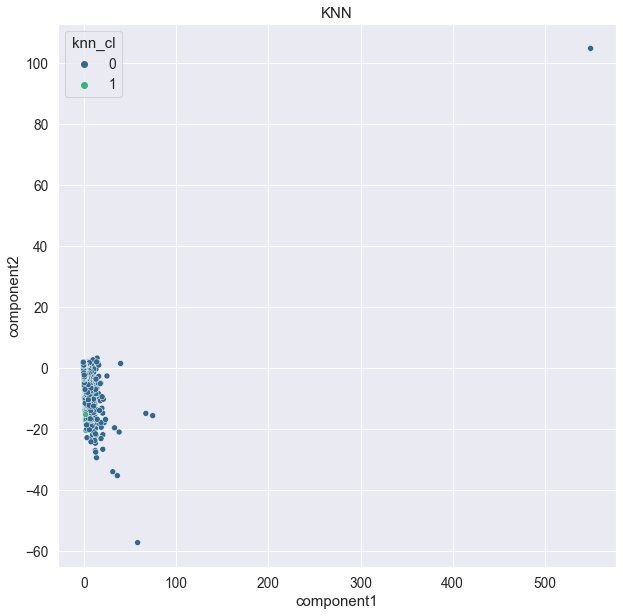

In [75]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='component1', y='component2', hue='knn_cl', palette='viridis')
plt.title('KNN')
plt.show()

In [77]:
pca_df['dtree_cl'] = dtree_fit.predict(X)

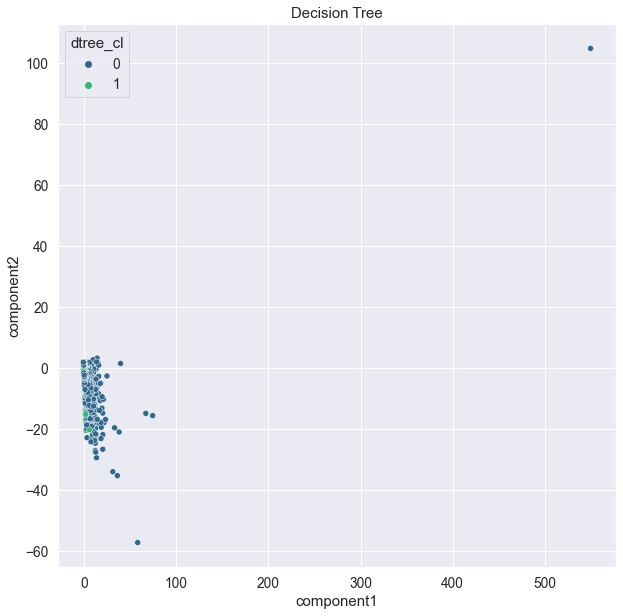

In [78]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='component1', y='component2', hue='dtree_cl', palette='viridis')
plt.title('Decision Tree')
plt.show()

In [80]:
pca_df['logreg_cl'] = logreg_fit.predict(scaled_df)

D:\Programs\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


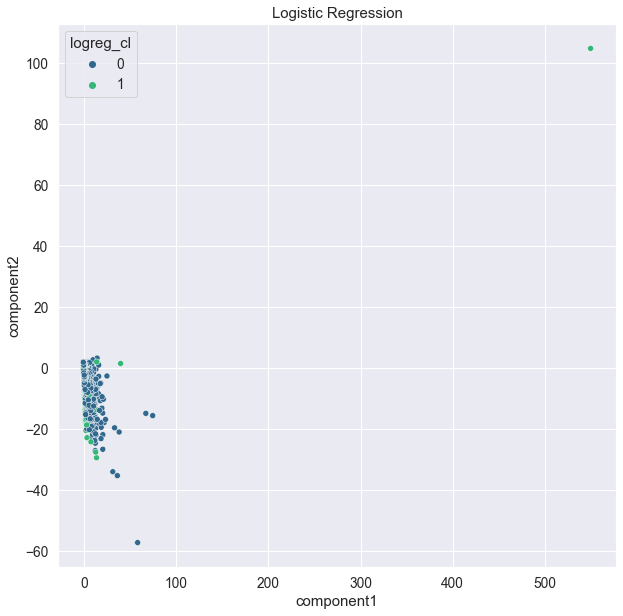

In [81]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='component1', y='component2', hue='logreg_cl', palette='viridis')
plt.title('Logistic Regression')
plt.show()

In [45]:
pca_df['svm_cl'] = svm_fit.predict(scaled_df)

D:\Programs\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


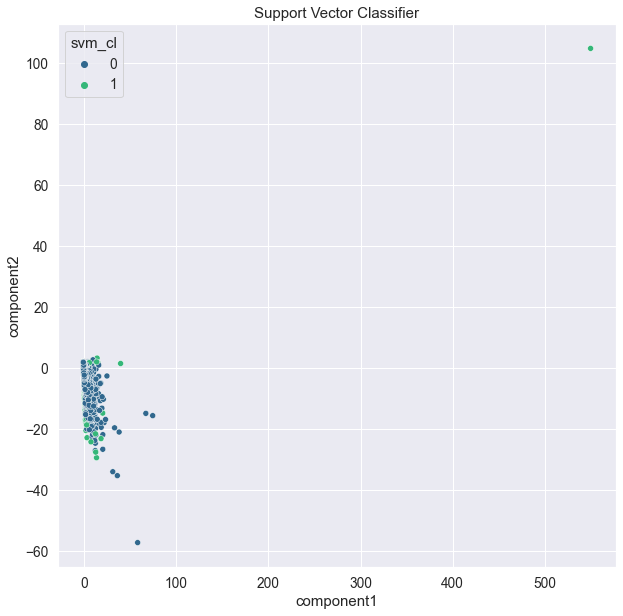

In [46]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='component1', y='component2', hue='svm_cl', palette='viridis')
plt.title('Support Vector Classifier')
plt.show()

In [82]:
pca_df['gb_cl'] = GB_fit.predict(X)

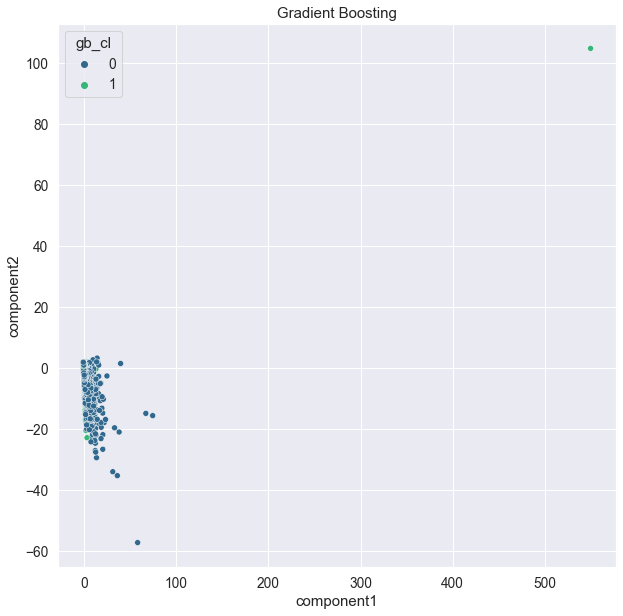

In [83]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='component1', y='component2', hue='gb_cl', palette='viridis')
plt.title('Gradient Boosting')
plt.show()

In [84]:
pca_df['rf_cl'] = RF_fit.predict(X)

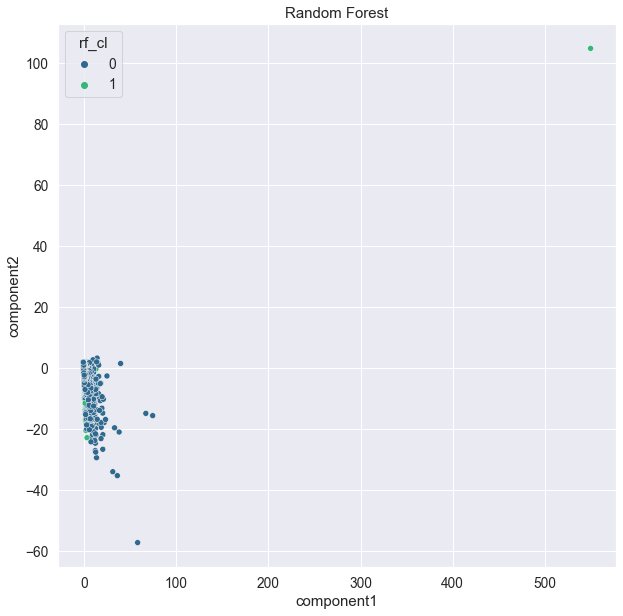

In [85]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='component1', y='component2', hue='rf_cl', palette='viridis')
plt.title('Random Forest')
plt.show()

# Вывод

Наилучшие результаты показал классификатор градиентного бустинга. Целесообразно использовать данный классификатор для выявления мошеннических транзакций.